<div dir="rtl">
با استفاده از تابع make_blobs داده هایی با دو ویژگی و دو کلاس تولید میکنیم. این تابع دیتاستی به ما میدهد که به صورت خطی جدایی پذیر است.
هر داده یک برچسب 0 یا 1 دارد که به ترتیب به معنای منفی و مثبت بودن عدد داده شده است.
</div>

In [41]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=41)

<div dir="rtl">
کلاس F یک کلاس استاتیک است که یک تابع دارد که عدد ورودی را چک میکند و اگر عدد مثبت یا صفر باشد 1 و در غیر اینصورت 0 برمیگرداند.
</div>

In [42]:
class F:
    @staticmethod
    def sign(x):
        return 1 if x >= 0 else 0

<div dir="rtl">
یک شبکه عصبی ساده که یک لایه دارد و هر نورون از نوع پرسپترون است را پیاده سازی میکنیم.
ابتدا وزن ها و بایاس های مدل را به صورت رندوم مقداردهی اولیه میکنیم.
سپس در تابع فوروارد با استفاده از ورن و بایاس نود و ورودی نود خروجی آن را به کمک تابع ساین اکتیویشن مشخص میکنیم.
</div>

In [43]:
import numpy as np

class Perceptron:
    def __init__(self, input_size):
        # Initialize the weights and biases of the new model
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand(1)
        
    def forward(self, input):
        # Feed input features to your model and return output
        return F.sign(np.dot(input, self.weights) + self.bias)


<div dir="rtl">
یک کلاس به نام اپتیمایزر داریم که یک مدل را به عنوان ورودی میگیرد و متدی دارد که وزن ها و بایاس های مدل را بروزرسانی میکند.
برای بروزرسانی وزن ها و بایاس هااز الگوریتم یادگیری پرسپترون استفاده میکنیم.
</div>

In [44]:
class Optimizer:
    def __init__(self, model):
        self.model = model
    def update(self, x, y, y_hat):
        # Update weight and bias of the model
        self.model.weights -= (y_hat - y) * x
        self.model.bias -= (y_hat - y)

<div dir="rtl">
حال مدل را ایجاد میکنیم و از اپتیمایزر برای بهینه سازی آن استفاده میکنیم.
</div>

In [45]:
perceptron = Perceptron(2)
optimizer = Optimizer(perceptron)



<div dir="rtl">
حلقه اصلی یادگیری را اجرا میکنیم.
در این حلقه ۱۰۰۰ ایتریشن انجام میدهیم و در هر ایتریشن بردار داده هارا یکی یکی به مدل میدهیم و وزن ها و بایاس ها را بروزرسانی میکنیم.
</div>

In [46]:
n_iter = 1000

for i in range(n_iter):
    for x_i, y_i in zip(X, y):
        y_hat = perceptron.forward(x_i)
        optimizer.update(x_i, y_i, y_hat)

<div dir="rtl">
دقت مدل را حساب کرده و نمایش میدهیم
</div>

In [47]:
y_hat = [perceptron.forward(x_i) for x_i in X]
accuracy = np.mean(y_hat == y)
print(accuracy)

1.0


<div dir="rtl">
داده ها و خطی که مدل یاد گرفته است را نمایش میدهیم.
</div>

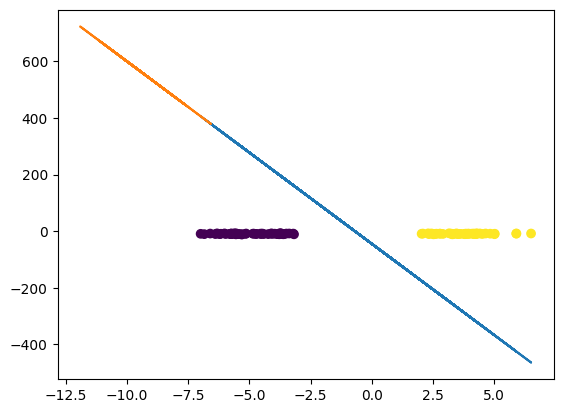

In [48]:
import matplotlib.pyplot as plt

# show the data and the line that the perceptron has learned
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(X, (-perceptron.weights[0] * X - perceptron.bias) / perceptron.weights[1])
plt.show()